In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL2xhdXJlbnQvTmV4dGNsb3VkL0xBVVJFTlQvTElWUkVTL3NpdGVfcmVncmVzc2lvbl9weXRob24vY29kZXM='
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
# globals()["__spec__"] = None

/var/folders/rw/lcb4hvdj44z2zh_2scz_3xgh0000gq/T/ipykernel_17090/1555994662.py:25: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/opt/miniconda3/lib/python3.12/importlib/_bootstrap.py": 1728049825.3314297, "/opt/miniconda3/lib/python3.12/importlib/_bootstrap_external.py": 1728049825.3348482, "/opt/miniconda3/lib/python3.12/zipimport.py": 1728049824.153947, "/opt/miniconda3/lib/python3.12/codecs.py": 1728049823.7001593, "/opt/miniconda3/lib/python3.12/encodings/aliases.py": 1728049824.5312598, "/opt/miniconda3/lib/python3.12/encodings/__init__.py": 1728049824.5277886, "/opt/miniconda3/lib/python3.12/encodings/utf_8.py": 1728049824.9295616, "/opt/miniconda3/lib/python3.12/abc.py": 1728049823.647853, "/opt/miniconda3/lib/python3.12/io.py": 1728049823.8195863, "/opt/miniconda3/lib/python3.12/stat.py": 1728049824.0119774, "/opt/miniconda3/lib/python3.12/_collections_abc.py": 1728049823.6009316, "/opt/miniconda3/lib/python3.12/genericpath.py": 1728049823.7784452, "/opt/miniconda3/lib/python3.12/posixpath.py": 1728049823.912881, "/opt/miniconda3/lib/python3.12/os.py": 1728049823.8794641, "/opt/miniconda3/lib/python3.

In [2]:
import pandas as pd; import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from patsy import dmatrix

In [3]:
SAheart = pd.read_csv("../donnees/SAh.csv", header=0, sep=",")

In [4]:
nomsvar = list(SAheart.columns.difference(["chd"]))
formule = "~ 1 +" + "+".join(nomsvar)
dsX = dmatrix(formule, data=SAheart)
X = np.asarray(dsX)[:,1:]
Y = SAheart["chd"].to_numpy()

In [5]:
scalerX = StandardScaler().fit(X)
Xcr= scalerX.transform(X)
l0 = np.abs(Xcr.transpose().dot((Y  - Y.mean()))).max()/X.shape[0]
llc = np.linspace(0,-4,100)
ll = l0*10**llc
Cs_lasso = 1/ 0.9/ X.shape[0] / (l0*10**(llc))
Cs_ridge = 1/ 0.9/ X.shape[0] / ((l0*10**(llc)) * 100)
Cs_enet =  1/ 0.9/ X.shape[0] / ((l0*10**(llc)) / 0.5)

In [6]:
coefs_lasso = []
coefs_enet = []
coefs_ridge = []

In [7]:
Xcr = StandardScaler().fit(X).transform(X)
for a, b, c in zip(Cs_lasso, Cs_ridge, Cs_enet) :
    ## lasso
    lasso = LogisticRegression(penalty="l1", C=a, solver="liblinear", warm_start=True).fit(Xcr, Y)
    coefs_lasso.append(lasso.coef_[0])
    ## ridge
    ridge = LogisticRegression(penalty="l2", C=b, warm_start=True).fit(Xcr, Y)
    coefs_ridge.append(ridge.coef_[0])
    ## enet
    enet = LogisticRegression(penalty="elasticnet", C=c, solver="saga", l1_ratio=0.5, warm_start=True).fit(Xcr, Y)
    coefs_enet.append(enet.coef_[0])

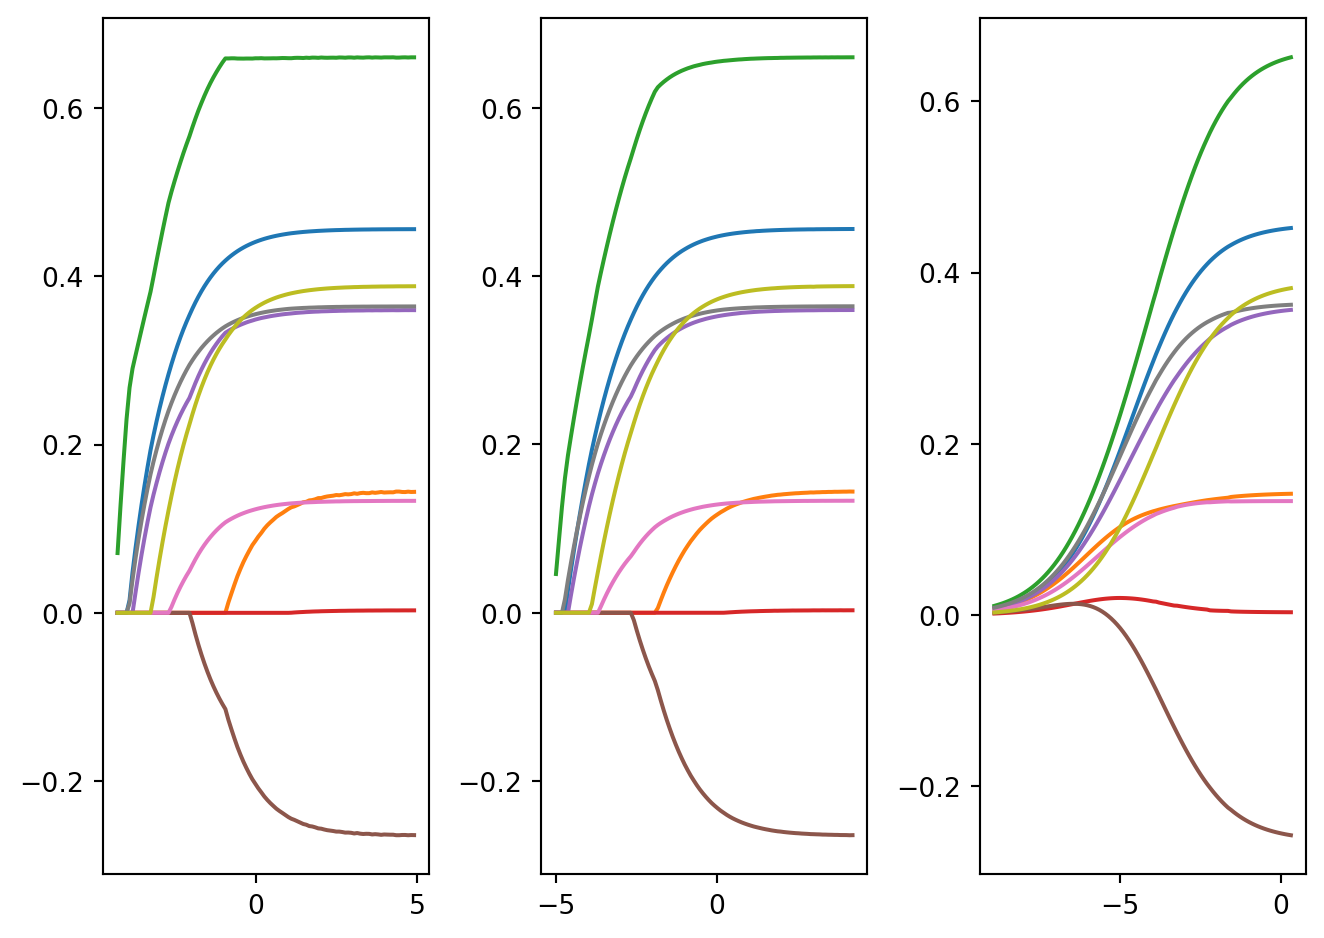

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.plot(np.log(Cs_lasso), coefs_lasso)
# ax1.set_xlabel(r"$\log(\alpha)$")
# ax1.set_ylabel("Coefficients")
ax2.plot(np.log(Cs_enet), coefs_enet)
# ax2.set_xlabel(r"$\log(\alpha^2)$")
# ax2.set_ylabel("Coefficients")
ax3.plot(np.log(Cs_ridge), coefs_ridge)
# ax3.set_xlabel(r"$\log(100\alpha)$")
# ax3.set_ylabel("Coefficients")
fig.tight_layout()

In [9]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

In [10]:
cr = StandardScaler()
lassocvM1 =  LogisticRegressionCV(cv=skf, penalty="l1", n_jobs=3, solver="liblinear", Cs=Cs_lasso, scoring="neg_log_loss")
ridgecvM1 = LogisticRegressionCV(cv=skf, penalty="l2", n_jobs=3, Cs=Cs_ridge, scoring="neg_log_loss")
enetcvM1 = LogisticRegressionCV(cv=skf, penalty="elasticnet", n_jobs=3, Cs= Cs_enet, solver="saga", l1_ratios=[0.5], scoring="neg_log_loss")

In [11]:
pipe_lassocvM1 = Pipeline(steps=[("cr", cr), ("lassocv", lassocvM1)])
pipe_ridgecvM1 = Pipeline(steps=[("cr", cr), ("ridgecv", ridgecvM1)])
pipe_enetcvM1 = Pipeline(steps=[("cr", cr), ("enetcv", enetcvM1)])

In [12]:
pipe_lassocvM1.fit(X,Y)
pipe_ridgecvM1.fit(X,Y)
pipe_enetcvM1.fit(X,Y)

Pipeline(steps=[('cr', StandardScaler()),
                ('enetcv',
                 LogisticRegressionCV(Cs=array([6.77620047e-03, 7.43687165e-03, 8.16195745e-03, 8.95773823e-03,
       9.83110664e-03, 1.07896274e-02, 1.18416028e-02, 1.29961444e-02,
       1.42632524e-02, 1.56539020e-02, 1.71801381e-02, 1.88551803e-02,
       2.06935371e-02, 2.27111314e-02, 2.49254387e-02, 2.73556382e-02,
       3.00227792e-02, 3.29499631e-02...
       1.67851660e+01, 1.84216989e+01, 2.02177918e+01, 2.21890016e+01,
       2.43524018e+01, 2.67267309e+01, 2.93325542e+01, 3.21924420e+01,
       3.53311654e+01, 3.87759104e+01, 4.25565138e+01, 4.67057214e+01,
       5.12594715e+01, 5.62572067e+01, 6.17422149e+01, 6.77620047e+01]),
                                      cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
                                      l1_ratios=[0.5], n_jobs=3,
                                      penalty='elasticnet',
                                      scoring='neg_log_loss', solver='saga'))])

In [13]:
cr = StandardScaler()
lassocvM2 =  LogisticRegressionCV(cv=skf, penalty="l1", n_jobs=3, solver="liblinear", Cs=Cs_lasso, scoring="accuracy")
ridgecvM2 = LogisticRegressionCV(cv=skf, penalty="l2", n_jobs=3, Cs=Cs_ridge, scoring="accuracy")
enetcvM2 = LogisticRegressionCV(cv=skf, penalty="elasticnet", n_jobs=3, Cs= Cs_enet, solver="saga", l1_ratios=[0.5], scoring="accuracy")
pipe_lassocvM2 = Pipeline(steps=[("cr", cr), ("lassocv", lassocvM2)])
pipe_ridgecvM2 = Pipeline(steps=[("cr", cr), ("ridgecv", ridgecvM2)])
pipe_enetcvM2 = Pipeline(steps=[("cr", cr), ("enetcv", enetcvM2)])
pipe_lassocvM2.fit(X,Y)
pipe_ridgecvM2.fit(X,Y)
pipe_enetcvM2.fit(X,Y)


cr = StandardScaler()
lassocvM3 =  LogisticRegressionCV(cv=skf, penalty="l1", n_jobs=3, solver="liblinear", Cs=Cs_lasso, scoring="roc_auc")
ridgecvM3 = LogisticRegressionCV(cv=skf, penalty="l2", n_jobs=3, Cs=Cs_ridge, scoring="roc_auc")
enetcvM3 = LogisticRegressionCV(cv=skf, penalty="elasticnet", n_jobs=3, Cs= Cs_enet, solver="saga", l1_ratios=[0.5], scoring="roc_auc")
pipe_lassocvM3 = Pipeline(steps=[("cr", cr), ("lassocv", lassocvM3)])
pipe_ridgecvM3 = Pipeline(steps=[("cr", cr), ("ridgecv", ridgecvM3)])
pipe_enetcvM3 = Pipeline(steps=[("cr", cr), ("enetcv", enetcvM3)])
pipe_lassocvM3.fit(X,Y)
pipe_ridgecvM3.fit(X,Y)
pipe_enetcvM3.fit(X,Y)
etape_lassoM3 = pipe_lassocvM3.named_steps["lassocv"]
etape_lassoM3.Cs_
etape_lassoM3.scores_[1]
etape_lassoM3.scores_[1].mean(axis=0)
etape_lassoM3.scores_[1].std(axis=0)/np.sqrt(10)

etape_lassoM1 = pipe_lassocvM1.named_steps["lassocv"]
etape_lassoM2 = pipe_lassocvM2.named_steps["lassocv"]
etape_lassoM3 = pipe_lassocvM3.named_steps["lassocv"]
etape_ridgeM1 = pipe_ridgecvM1.named_steps["ridgecv"]
etape_ridgeM2 = pipe_ridgecvM2.named_steps["ridgecv"]
etape_ridgeM3 = pipe_ridgecvM3.named_steps["ridgecv"]
etape_enetM1 = pipe_enetcvM1.named_steps["enetcv"]
etape_enetM2 = pipe_enetcvM2.named_steps["enetcv"]
etape_enetM3 = pipe_enetcvM3.named_steps["enetcv"]

Text(0.99, 0.1, 'ElasticNet - AUC')

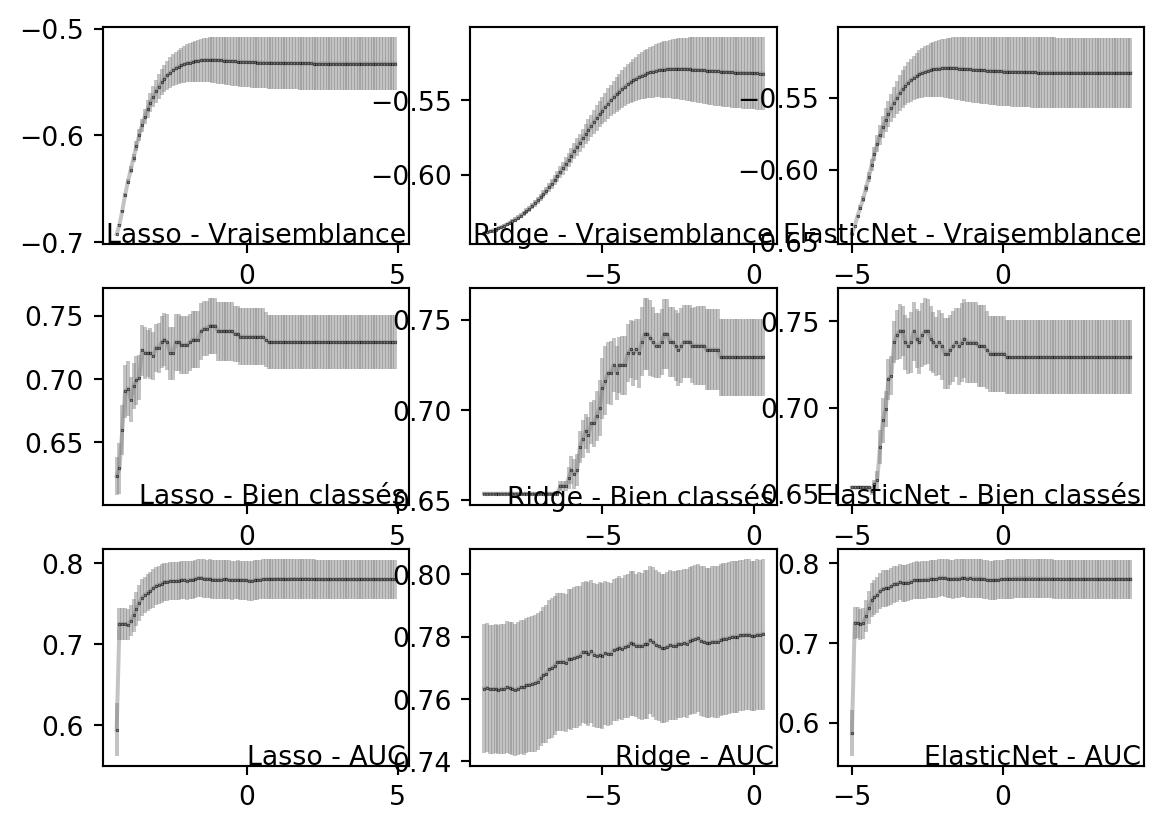

In [14]:
fig, axs = plt.subplots(3, 3)
axs[0,0].errorbar(np.log(Cs_lasso), etape_lassoM1.scores_[1].mean(axis=0), etape_lassoM1.scores_[1].std(axis=0)/np.sqrt(10), fmt="-o", mec="black", mfc="black", ms=0.2, color="#80808077")
axs[0,0].text(.99, .1, "Lasso - Vraisemblance", ha="right", va="top",transform=axs[0,0].transAxes)
axs[0,1].errorbar(np.log(Cs_ridge), etape_ridgeM1.scores_[1].mean(axis=0), etape_ridgeM1.scores_[1].std(axis=0)/np.sqrt(10), fmt="-o", mec="black", mfc="black", ms=0.2, color="#80808077")
axs[0,1].text(.99, .1, "Ridge - Vraisemblance", ha="right", va="top",transform=axs[0,1].transAxes)
axs[0,2].errorbar(np.log(Cs_enet), etape_enetM1.scores_[1][:,:,0].mean(axis=0), etape_enetM1.scores_[1][:,:,0].std(axis=0)/np.sqrt(10), fmt="-o", mec="black", mfc="black", ms=0.2, color="#80808077")
axs[0,2].text(.99, .1, "ElasticNet - Vraisemblance", ha="right", va="top",transform=axs[0,2].transAxes)
##
axs[1,0].errorbar(np.log(Cs_lasso), etape_lassoM2.scores_[1].mean(axis=0), etape_lassoM2.scores_[1].std(axis=0)/np.sqrt(10), fmt="-o", mec="black", mfc="black", ms=0.2, color="#80808077")
axs[1,0].text(.99, .1, "Lasso - Bien classés", ha="right", va="top",transform=axs[1,0].transAxes)
axs[1,1].errorbar(np.log(Cs_ridge), etape_ridgeM2.scores_[1].mean(axis=0), etape_ridgeM2.scores_[1].std(axis=0)/np.sqrt(10), fmt="-o", mec="black", mfc="black", ms=0.2, color="#80808077")
axs[1,1].text(.99, .1, "Ridge - Bien classés", ha="right", va="top",transform=axs[1,1].transAxes)
axs[1,2].errorbar(np.log(Cs_enet), etape_enetM2.scores_[1][:,:,0].mean(axis=0), etape_enetM2.scores_[1][:,:,0].std(axis=0)/np.sqrt(10), fmt="-o", mec="black", mfc="black", ms=0.2, color="#80808077")
axs[1,2].text(.99, .1, "ElasticNet - Bien classés", ha="right", va="top",transform=axs[1,2].transAxes)
##
axs[2,0].errorbar(np.log(Cs_lasso), etape_lassoM3.scores_[1].mean(axis=0), etape_lassoM3.scores_[1].std(axis=0)/np.sqrt(10), fmt="-o", mec="black", mfc="black", ms=0.2, color="#80808077")
axs[2,0].text(.99, .1, "Lasso - AUC", ha="right", va="top",transform=axs[2,0].transAxes)
axs[2,1].errorbar(np.log(Cs_ridge), etape_ridgeM3.scores_[1].mean(axis=0), etape_ridgeM3.scores_[1].std(axis=0)/np.sqrt(10), fmt="-o", mec="black", mfc="black", ms=0.2, color="#80808077")
axs[2,1].text(.99, .1, "Ridge - AUC", ha="right", va="top",transform=axs[2,1].transAxes)
axs[2,2].errorbar(np.log(Cs_enet), etape_enetM3.scores_[1][:,:,0].mean(axis=0), etape_enetM3.scores_[1][:,:,0].std(axis=0)/np.sqrt(10), fmt="-o", mec="black", mfc="black", ms=0.2, color="#80808077")
axs[2,2].text(.99, .1, "ElasticNet - AUC", ha="right", va="top",transform=axs[2,2].transAxes)

In [15]:
pipe_lassocvM3.predict_proba(X[[14,49],:])

array([[0.46132227, 0.53867773],
       [0.85489237, 0.14510763]])

In [16]:
X1 = np.concatenate((np.repeat("A", 60), np.repeat("B", 90), np.repeat("C", 50)))
X2 = np.concatenate((np.repeat("E", 40), np.repeat("F", 60), np.repeat("G", 55), np.repeat("H",45)))
rng = np.random.default_rng(1298)
X3 = rng.uniform(low=0.0, high=1.0, size=200)
rng = np.random.default_rng(2381)
Y = rng.uniform(low=0.0, high=1.0, size=200).round(0)
Y1 = np.sign(2*Y-1)
donnees = pd.DataFrame({"X1": X1, "X2": X2, "X3": X3, "Y": Y, "Y1": Y1})

In [17]:
import group_lasso

In [18]:
#| eval: false
 
coefs_lasso = []
coefs_glasso = np.zeros((alphas.shape[0], 6))
Cs_lasso = 1/ X.shape[0] / alphas
for index, (a, b) in enumerate(zip(Cs_lasso, alphas)) :
    lasso = LogisticRegression(penalty="l1", C=a, solver="liblinear", warm_start=True).fit(Xcr, donnees.Y)
    coefs_lasso.append(lasso.coef_[0])
    glasso = LogisticGroupLasso(groups=[1, 1, 2, 2, 2, 3], group_reg=b, l1_reg=0, scale_reg="group_size").fit(Xcr, donnees.Y)
    ## c"est la difference des coef des 2 classes
    coefs_glasso[index,:] = (glasso.coef_[:, 1] - glasso.coef_[:, 0])

In [19]:
#| eval: false

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(np.log(Cs_lasso), coefs_lasso)
for j, g in enumerate([1, 1, 2, 2, 2, 3]):
    # sur l"echelle des Cs et des alphas...
    ax2.plot(np.log(Cs_lasso), coefs_glasso[:,j], color="C"+str(g), \
             ls=["-", "--", "-.",":" ][g])
fig.tight_layout()